In [118]:
import numpy as np
import matplotlib.pyplot as plt
from ipynb.fs.full.dataset import *

In [69]:
x_train_orig, y_train_orig = load_train_data()
x_test_orig, y_test_orig = load_test_data()

In [70]:
print(x_train_orig.shape)
print(y_train_orig.shape)
print(x_test_orig.shape)
print(y_test_orig.shape)

(320, 28, 28, 3)
(320, 1)
(20, 28, 28, 3)
(20, 1)


In [71]:
x_train = x_train_orig.reshape(x_train_orig.shape[0], -1).T
y_train = y_train_orig.T

x_test = x_test_orig.reshape(x_test_orig.shape[0],-1).T
y_test = y_test_orig.T

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2352, 320)
(1, 320)
(2352, 20)
(1, 20)


In [72]:
x_train = x_train / 255
x_test = x_test / 255

In [39]:
def initialize_parameters(n_x):
    '''
    Returns a dict named 'params' containing a weight vector of shape (n_x, 1) and a bias
    '''
    w = np.zeros((n_x, 1))
    assert(w.shape == (n_x, 1))
    
    b = 0
    
    params = {
        'w': w,
        'b': b
    }
    
    return params

In [40]:
def sigmoid(z):
    '''
    Applies sigmoid (logistic function) to the vector, z and returns the output
    '''
    
    a = 1 / (1 + np.exp(-z))
    assert(a.shape == z.shape)
    
    return a

In [46]:
def calculate_cost(a, y):
    '''
    Returns the cost of one iteration: cost
    '''
    m = a.shape[1]
    assert(m == y.shape[1])
    
    cost = -(y * np.log(a) + (1-y) * np.log(1 - a))
    cost = cost.sum(axis = 1) / m
    
    cost = np.squeeze(cost)
    
    return cost

In [63]:
def linear_forward(x, params):
    '''
    Returns the pre-activation vector: z
    '''
    w = params['w']
    b = params['b']
    
    z = np.dot(w.T, x) + b
    #print(z.shape)
    assert(z.shape == (1, x.shape[1]))
    
    return z

In [61]:
def backpropagation(x, a, y):
    '''
    Returns derivative of parameters: dw, db
    '''
    m = y.shape[1]
    
    dz = a - y
    
    dw = np.dot(x, dz.T) / m
    
    db = dz.sum(axis = 1, keepdims = True) / m
    
    grads = {
        'dw': dw,
        'db': db
    }
    
    return grads

In [45]:
def update_parameters(params, grads, learning_rate):
    '''
    updates parameters
    '''
    
    params['w'] = params['w'] - learning_rate * grads['dw']
    params['b'] = params['b'] - learning_rate * grads['db']

In [139]:
def optimize(x, y, learning_rate, number_of_iterations, print_cost = False):
    
    n_x = x.shape[0]
    assert(n_x == x.shape[0])
    
    params = initialize_parameters(n_x)
    
    costs = []
    
    for i in range(number_of_iterations):
        z = linear_forward(x, params)
        
        a = sigmoid(z)
        
        cost = calculate_cost(a, y)
        
        if i % 100 == 0:
            costs.append(cost)
        
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: (%f)" %(i, cost))
        
        grads = backpropagation(x, a, y)
        
        update_parameters(params, grads, learning_rate)
        
    return params, costs

In [75]:
params, costs = optimize(x_train, y_train, learning_rate=0.009, number_of_iterations=2000, print_cost=True)

Cost after iteration 0: (0.693147)
Cost after iteration 100: (0.380234)
Cost after iteration 200: (0.263268)
Cost after iteration 300: (0.200366)
Cost after iteration 400: (0.160802)
Cost after iteration 500: (0.133687)
Cost after iteration 600: (0.114032)
Cost after iteration 700: (0.099191)
Cost after iteration 800: (0.087626)
Cost after iteration 900: (0.078382)
Cost after iteration 1000: (0.070840)
Cost after iteration 1100: (0.064579)
Cost after iteration 1200: (0.059303)
Cost after iteration 1300: (0.054802)
Cost after iteration 1400: (0.050918)
Cost after iteration 1500: (0.047537)
Cost after iteration 1600: (0.044566)
Cost after iteration 1700: (0.041937)
Cost after iteration 1800: (0.039596)
Cost after iteration 1900: (0.037497)


In [76]:
def predict(x, params):
    z = linear_forward(x, params)
    
    a = sigmoid(z)
    
    y_predict = np.empty(a.shape)
    assert(y_predict.shape == a.shape)
    
    y_predict = (a > 0.5)
    
    return y_predict

In [80]:
def linear_regression_model(x_train, y_train, x_test, y_test, learning_rate, number_of_iterations, print_cost = False):
    m = x_train.shape[1]
    
    params, costs = optimize(x_train, y_train, learning_rate, number_of_iterations, print_cost)
    
    train_predict_y = predict(x_train, params)
    test_predict_y = predict(x_test, params)
    
    train_accuracy = 100 - (np.mean(np.abs(train_predict_y - y_train)) * 100)
    test_accuracy = 100 - (np.mean(np.abs(test_predict_y - y_test)) * 100)
    
    print("Train accuracy: {}%".format(train_accuracy))
    print("Test accuracy: {}%".format(test_accuracy))
    
    trained_model = {
        'costs': costs,
        'params': params,
        'learning_rate': learning_rate,
        'number_of_iterations': number_of_iterations,
        'y_prediction_train': train_predict_y,
        'y_prediction_test': test_predict_y
    }
    
    return trained_model

In [145]:
trained_model = linear_regression_model(x_train, y_train, x_test, y_test, learning_rate=0.0003, number_of_iterations=20000, print_cost=True)

Cost after iteration 0: (0.693147)
Cost after iteration 100: (0.674178)
Cost after iteration 200: (0.656408)
Cost after iteration 300: (0.639566)
Cost after iteration 400: (0.623585)
Cost after iteration 500: (0.608402)
Cost after iteration 600: (0.593960)
Cost after iteration 700: (0.580207)
Cost after iteration 800: (0.567096)
Cost after iteration 900: (0.554583)
Cost after iteration 1000: (0.542628)
Cost after iteration 1100: (0.531194)
Cost after iteration 1200: (0.520248)
Cost after iteration 1300: (0.509760)
Cost after iteration 1400: (0.499700)
Cost after iteration 1500: (0.490043)
Cost after iteration 1600: (0.480765)
Cost after iteration 1700: (0.471843)
Cost after iteration 1800: (0.463257)
Cost after iteration 1900: (0.454988)
Cost after iteration 2000: (0.447017)
Cost after iteration 2100: (0.439330)
Cost after iteration 2200: (0.431910)
Cost after iteration 2300: (0.424743)
Cost after iteration 2400: (0.417816)
Cost after iteration 2500: (0.411118)
Cost after iteration 260

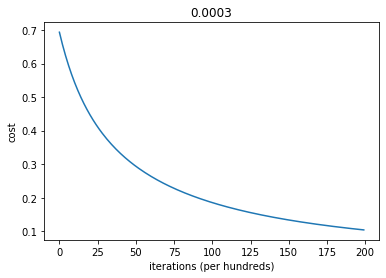

In [146]:
costs = np.squeeze(trained_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('{}'.format(trained_model['learning_rate']))
plt.show()